In [1]:
#Necessary imports for data cleaning and analysis
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
from matplotlib import text

##Data Modification & Cleaning

In [2]:
NYC_Taxi = pd.read_csv('/content/drive/Shareddrives/MATH 3439 Work/Project 1/NYC Taxi Rides.csv')
NYC_Taxi.head()

<ipython-input-2-5f40507340b6>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  NYC_Taxi = pd.read_csv('/content/drive/Shareddrives/MATH 3439 Work/Project 1/NYC Taxi Rides.csv')


,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,...,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,...,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,...,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,...,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,...,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [3]:
NYC_Taxi_Zones = pd.read_csv('/content/drive/Shareddrives/MATH 3439 Work/Project 1/taxi_zones.csv')
NYC_Taxi_Zones.head()

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island


###Merging Taxi Zones and Taxicab Ride CSV Files

Our data included the records recorded for ~2.5 million Taxicab rides and a separate CSV sourced from Data.gov containing the breakdown of Boroughs and their corresponding Location ID. In an effort to streamline analysis of our dataset, we have merged these two datasets together.

We checked that our code correctly merged in the following Data Cleaning section by overall checking for `NaN` values in our dataframe and mapping the correct borough information into any rows with missing data utilizing the maps found on the official NYC TLC website (linked [here](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page?utm_cta=website-webinars-featured-open-source-building%3Fwtime&wtime=1807s)).



In [4]:
"""
Joining our Taxi Rides and Taxi Zones CSV files so that PULocationID and
DOLocationID correspond with specific boroughs in NYC.
"""

# Merge to add boroughs for both pickup and dropoff locations
for loc_type, new_col in [('PULocationID', 'Pickup_Borough'), ('DOLocationID', 'Dropoff_Borough')]:
    NYC_Taxi = NYC_Taxi.merge(
        NYC_Taxi_Zones[['LocationID', 'borough']],
        how='left',
        left_on=loc_type,
        right_on='LocationID'
    ).rename(columns={'borough': new_col}).drop(columns=['LocationID'])

NYC_Taxi.head()

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pickup_Borough,Dropoff_Borough
0,0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,...,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,Manhattan,Manhattan
1,1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,...,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,Manhattan,Manhattan
2,2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,...,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,Manhattan,Manhattan
3,3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,...,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,Manhattan,Manhattan
4,4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,...,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,Manhattan,Manhattan


In [5]:
#Saving this altered CSV file for use by all team members

NYC_Taxi.to_csv('/content/drive/Shareddrives/MATH 3439 Work/Project 1/NYC_Taxi_Rides_w_Boroughts.csv')

###Shifting the NYC_Taxi_Zones dataframe

During analysis, the want to create maps based on which pickup and dropoff locations are accounting for at least 1% of specific rides arised. The following section will take you through changing the data in the `NYC_Taxi_Zones` dataframe in order to generate maps.

In [6]:
#Checking if the data types within the NYC_Taxi_Zones df need to be changed
NYC_Taxi_Zones.dtypes #because the_geom column is an object, we'll need to convert into actual geometry using shapely

,0
OBJECTID,int64
Shape_Leng,float64
the_geom,object
Shape_Area,float64
zone,object
LocationID,int64
borough,object


In [7]:
#Convert the 'the_geom' column into actual geometic shapes
NYC_Taxi_Zones['geometry'] = NYC_Taxi_Zones['the_geom'] = NYC_Taxi_Zones['the_geom'].apply(wkt.loads)

#Create a GeoDataFrame with the geometry column
geo_taxi_zones = gpd.GeoDataFrame(
    NYC_Taxi_Zones, geometry='geometry', crs='EPSG:4326'
)

#Drop the original 'the_geom' column if no longer needed
geo_taxi_zones = geo_taxi_zones.drop(columns=['the_geom'])

geo_taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"MULTIPOLYGON (((-74.18445 40.695, -74.18449 40..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."


###Data Cleaning

The following section will include looking at our dataset to identify any columns or rows that should either be excluded from analysis or modified to fit our needs.

In [8]:
NYC_Taxi.head()

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pickup_Borough,Dropoff_Borough
0,0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,...,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,Manhattan,Manhattan
1,1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,...,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,Manhattan,Manhattan
2,2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,...,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,Manhattan,Manhattan
3,3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,...,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,Manhattan,Manhattan
4,4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,...,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,Manhattan,Manhattan


In [9]:
"""
Checking how many missing values are in each column with percentages to
determine if missing values will significantly affect analysis
"""

NYC_Taxi.isna().mean()

,0
Unnamed: 0.1,0.000000
Unnamed: 0,0.000000
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,0.029024
trip_distance,0.000000
RatecodeID,0.029024
store_and_fwd_flag,0.029024
PULocationID,0.000000


####Dealing with missing data from borough columns

For `Pickup_Borough` and `Dropoff_Borough`, about 200 rows of data is missing, which given the size of our dataset (~2.5 million rows), would not significantly impact our analysis. However, because the only missing data is concentrated within the columns we added to the dataset previously, our team felt it would be advantageous to more closely investigate these columns rather than initially excluding them from the data.

In [10]:
#Investigating missing pickup borough information
missing_pickup = NYC_Taxi[NYC_Taxi['Pickup_Borough'].isna()]

pulocation_ids = missing_pickup['PULocationID'].unique()
pulocation_ids

array([265, 264,  57, 105])

In [11]:
#Investigating missing dropoff borough information
missing_dropoff = NYC_Taxi[NYC_Taxi['Dropoff_Borough'].isna()]

dolocation_ids = missing_dropoff['DOLocationID'].unique()
dolocation_ids

array([265, 264,  57, 105])

`Pickup_Borough` and `Dropff_Borough` columns are missing data from the same 4 location IDs. Utilizing the same NYC TLC website linked in the merging dataframes section, we identified which borough our
LocationIDs correspond with.

* LocationID 265 = Unknown
* LocationID 264 = Unknown
* LocationID 57 = Queens
* LocationID 105 = Manhattan

While two LocationIDs will be Unknown values, by double-checking the missing columns, we have ensured that our merge was successful.

The following next bits of code involve the process for how we added in the appropriate borough for each LocationID.

In [12]:
#Starting with Pickup_Borough

#Create a dictionary mapping PULocation to Boroughs
pulocation_to_borough = {
    265: 'Unknown',
    264: 'Unknown',
    57: 'Queens',
    105: 'Manhattan'
}

#Fill missing Pickup_Borough values with the mapping
NYC_Taxi['Pickup_Borough'] = NYC_Taxi.apply(
    lambda row: pulocation_to_borough[row['PULocationID']]
    if pd.isna(row['Pickup_Borough']) and row['PULocationID'] in pulocation_to_borough
    else row['Pickup_Borough'],
    axis=1
)

#Verifying that there are no more missing values in Pickup_Borough
print(NYC_Taxi['Pickup_Borough'].isna().sum())

0


In [13]:
#Doing the same for Dropoff_Borough

dolocation_to_borough = {
    265: 'Unknown',
    264: 'Unknown',
    57: 'Queens',
    105: 'Manhattan'
}

NYC_Taxi['Dropoff_Borough'] = NYC_Taxi.apply(
    lambda row: dolocation_to_borough[row['DOLocationID']]
    if pd.isna(row['Dropoff_Borough']) and row['DOLocationID'] in dolocation_to_borough
    else row['Dropoff_Borough'],
    axis=1
)

print(NYC_Taxi['Dropoff_Borough'].isna().sum())

0


In [14]:
#Saving altered CSV to include updated borough assingment

NYC_Taxi.to_csv('/content/drive/Shareddrives/MATH 3439 Work/Project 1/NYC_Taxi_Rides_w_Boroughts.csv')

####Checking columns with expected limited unique values

Several of our columns were expected to have limited unique values (i.e. `payment_type`, `VendorID`, `congestion surcharge`, etc.) In order to quickly identify if the values in these columns is what we expect, we used this following section to investigate the various values in columns and includes any notes about data that can be excluded from the data.

In instances where there are negative values of the exact same amount as the charge, we are understanding these values as accidental extras that may not have been applicable and thus had to be removed from the fare price. With 2 million trips recorded, it is highly likely that mistakes occur.

In [15]:
NYC_Taxi.head()

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pickup_Borough,Dropoff_Borough
0,0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,...,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,Manhattan,Manhattan
1,1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,...,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,Manhattan,Manhattan
2,2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,...,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,Manhattan,Manhattan
3,3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,...,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,Manhattan,Manhattan
4,4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,...,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,Manhattan,Manhattan


In [16]:
NYC_Taxi['VendorID'].value_counts() #Should only include values 1, 2, 5 & 6

,count
VendorID,
2,1716604
1,742582
6,5585
5,36


In [17]:
"""
Value of 99 indicates a non-standard fee, based on our research.
This ratecode accounts for 0.36% of data. We may chose to exclude these data points
for ease of analysis.
"""

NYC_Taxi['RatecodeID'].value_counts() #Should only include values 1 - 6 and 99

,count
RatecodeID,
1.0,2297090
2.0,66651
5.0,13577
99.0,8802
3.0,4014
4.0,3118
6.0,17


In [18]:
NYC_Taxi['payment_type'].value_counts() #Should only include values 1 - 6

,count
payment_type,
1,1875250
2,495617
0,71538
3,11718
4,10683
5,1


In [19]:
NYC_Taxi['extra'].value_counts() #Should only include values $0.50 - $1

#Will come back to fixing this section

,count
extra,
0.00,1048735
0.50,395831
2.50,372285
1.00,320962
3.00,141280
...,...
1.80,1
0.10,1
9.00,1


In [20]:
"""
Values that don't fall within expected range account for 0.0003% of data and
will be excluded from analysis.
"""

NYC_Taxi['mta_tax'].value_counts() #Should only include values $0.50

,count
mta_tax,
0.50,2435169
0.00,17035
-0.50,12581
0.07,7
-0.07,5
3.30,3
0.35,1
16.59,1
0.08,1


In [21]:
NYC_Taxi['improvement_surcharge'].value_counts() #Should only include values $0.00, $0.30, or -$0.30

,count
improvement_surcharge,
0.3,2450772
-0.3,12902
0.0,1133


In [22]:
"""
Values that don't fall within expected range account for 0.0002% of data
and will be excluded from analysis.
"""

NYC_Taxi['congestion_surcharge'].value_counts() #Should only include values $0.00, $2.50 or -$2.50

,count
congestion_surcharge,
2.50,2195028
0.00,187597
-2.50,10638
0.75,5
1.00,1


In [23]:
NYC_Taxi['airport_fee'].value_counts() #Should only include values $0.00, $1.25, or -$1.25

,count
airport_fee,
0.00,2232911
1.25,159301
-1.25,1057


####Changing data types



Several of the datatypes needs to be shifted in order for effecient and accurate analysis. These included `RatecodeID`, `payment_type`, `passenger_count`, `tpep_pickup_datetime`, & `tpep_dropoff_datetime`. We have broken up this change by the type of change we're making.

#####Floats to integers

In [24]:
#Checking that our columns of interest need to be changed.
NYC_Taxi.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
VendorID,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64


In [25]:
NYC_Taxi['RatecodeID'] = NYC_Taxi['RatecodeID'].fillna(0).astype(int)
NYC_Taxi['payment_type'] = pd.to_numeric(NYC_Taxi['payment_type'], errors='coerce')
NYC_Taxi['passenger_count'] = NYC_Taxi['passenger_count'].fillna(0).astype(int)

In [26]:
#Checking that our code successfully shifted the columns from floats to integers.
NYC_Taxi.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
VendorID,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,int64
trip_distance,float64
RatecodeID,int64
store_and_fwd_flag,object
PULocationID,int64


##### Date & Time

In [27]:
NYC_Taxi.head()

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pickup_Borough,Dropoff_Borough
0,0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2,3.80,1,N,142,...,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,Manhattan,Manhattan
1,1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,1,N,236,...,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,Manhattan,Manhattan
2,2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,1,N,166,...,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,Manhattan,Manhattan
3,3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,1,N,114,...,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,Manhattan,Manhattan
4,4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1,4.30,1,N,68,...,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,Manhattan,Manhattan


In [28]:
#Adding 12_hour time formatted column for `tpep_pickup_datetime`

NYC_Taxi['tpep_pickup_datetime'] = pd.to_datetime(NYC_Taxi['tpep_pickup_datetime'])
NYC_Taxi['tpep_pickup_time'] = NYC_Taxi['tpep_pickup_datetime'].dt.strftime('%I:%M %p')


In [29]:
#Adding 12_hour time formatted column for `tpep_dropoff_datetime`

NYC_Taxi['tpep_dropoff_datetime'] = pd.to_datetime(NYC_Taxi['tpep_dropoff_datetime'])
NYC_Taxi['tpep_dropoff_time'] = pd.to_datetime(NYC_Taxi['tpep_dropoff_datetime']).dt.strftime('%I:%M %p')

In [30]:
NYC_Taxi.head()

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pickup_Borough,Dropoff_Borough,tpep_pickup_time,tpep_dropoff_time
0,0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2,3.80,1,N,142,...,3.65,0.0,0.3,21.95,2.5,0.0,Manhattan,Manhattan,12:35 AM,12:53 AM
1,1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,1,N,236,...,4.00,0.0,0.3,13.30,0.0,0.0,Manhattan,Manhattan,12:33 AM,12:42 AM
2,2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,1,N,166,...,1.76,0.0,0.3,10.56,0.0,0.0,Manhattan,Manhattan,12:53 AM,01:02 AM
3,3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,1,N,114,...,0.00,0.0,0.3,11.80,2.5,0.0,Manhattan,Manhattan,12:25 AM,12:35 AM
4,4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1,4.30,1,N,68,...,3.00,0.0,0.3,30.30,2.5,0.0,Manhattan,Manhattan,12:36 AM,01:14 AM


In [31]:
#Adding day of the week column for `tpep_pickup_datetime`

NYC_Taxi['tpep_pickup_datetime'] = pd.to_datetime(NYC_Taxi['tpep_pickup_datetime'])
NYC_Taxi['tpep_pickup_day'] = NYC_Taxi['tpep_pickup_datetime'].dt.day_name()

In [32]:
#Repeating for `tpep_dropoff_datetime

NYC_Taxi['tpep_dropoff_datetime'] = pd.to_datetime(NYC_Taxi['tpep_dropoff_datetime'])
NYC_Taxi['tpep_dropoff_day'] = NYC_Taxi['tpep_dropoff_datetime'].dt.day_name()

In [33]:
NYC_Taxi.head()

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pickup_Borough,Dropoff_Borough,tpep_pickup_time,tpep_dropoff_time,tpep_pickup_day,tpep_dropoff_day
0,0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2,3.80,1,N,142,...,0.3,21.95,2.5,0.0,Manhattan,Manhattan,12:35 AM,12:53 AM,Saturday,Saturday
1,1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,1,N,236,...,0.3,13.30,0.0,0.0,Manhattan,Manhattan,12:33 AM,12:42 AM,Saturday,Saturday
2,2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,1,N,166,...,0.3,10.56,0.0,0.0,Manhattan,Manhattan,12:53 AM,01:02 AM,Saturday,Saturday
3,3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,1,N,114,...,0.3,11.80,2.5,0.0,Manhattan,Manhattan,12:25 AM,12:35 AM,Saturday,Saturday
4,4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1,4.30,1,N,68,...,0.3,30.30,2.5,0.0,Manhattan,Manhattan,12:36 AM,01:14 AM,Saturday,Saturday


In [34]:
#Re-ordering NYC_Taxi columns to account for the added columns we have accumulated so far.
#this process also removes the unnecessary `Unnamed` columns at the beginning of the dataframe

NYC_Taxi = NYC_Taxi[['VendorID', 'tpep_pickup_datetime', 'tpep_pickup_day', 'tpep_pickup_time',
                     'tpep_dropoff_datetime', 'tpep_dropoff_day', 'tpep_dropoff_time',
                     'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
                     'PULocationID', 'Pickup_Borough', 'DOLocationID', 'Dropoff_Borough',
                     'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                     'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
                     'airport_fee', 'total_amount']]

In [35]:
NYC_Taxi.head()

,VendorID,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,RatecodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
0,1,2022-01-01 00:35:40,Saturday,12:35 AM,2022-01-01 00:53:29,Saturday,12:53 AM,2,3.80,1,...,1,14.5,3.0,0.5,3.65,0.0,0.3,2.5,0.0,21.95
1,1,2022-01-01 00:33:43,Saturday,12:33 AM,2022-01-01 00:42:07,Saturday,12:42 AM,1,2.10,1,...,1,8.0,0.5,0.5,4.00,0.0,0.3,0.0,0.0,13.30
2,2,2022-01-01 00:53:21,Saturday,12:53 AM,2022-01-01 01:02:19,Saturday,01:02 AM,1,0.97,1,...,1,7.5,0.5,0.5,1.76,0.0,0.3,0.0,0.0,10.56
3,2,2022-01-01 00:25:21,Saturday,12:25 AM,2022-01-01 00:35:23,Saturday,12:35 AM,1,1.09,1,...,2,8.0,0.5,0.5,0.00,0.0,0.3,2.5,0.0,11.80
4,2,2022-01-01 00:36:48,Saturday,12:36 AM,2022-01-01 01:14:20,Saturday,01:14 AM,1,4.30,1,...,1,23.5,0.5,0.5,3.00,0.0,0.3,2.5,0.0,30.30


In [36]:
#Saving this modified and cleaned dataframe to the same path for use by all team members.

NYC_Taxi.to_csv('/content/drive/Shareddrives/MATH 3439 Work/Project 1/NYC_Taxi_Rides_w_Boroughts.csv')

In [37]:
NYC_Taxi.shape

(2464807, 25)

##Functions used during analysis

Several functions were defined during the course of data analysis. These range from easily creating filtered Panda Series to view subsets of our larger `NYC_Taxi` dataframe to plotting static maps used in locational analysis. These function definitions and descriptions can be found below.

In [38]:
#Creating a function to streamline the numerous Pandas Series' created for analysis and plotting purposes

def percentage_of_location(df, column):
  """
  Calculate the percentage for a specific column in a Dataframe, reset the index,
  and rename the columns for better usability

  Parameters:
  - df (DataFraeme): Input DataFrame.
  - column (str): column name to calculate percentage for

  Returns:
  - DataFrame
  """
  #Calculate the percentage
  # The argument `normalize=True` should be inside the parentheses of `value_counts()`
  distribution = df[column].value_counts(normalize=True) * 100

  #Convert to DataFrame and reset index
  percentage_df = pd.DataFrame(distribution).reset_index()

  #Rename columns
  percentage_df.columns = ['LocationID', 'Ride_Percent']

  #Round percentages for readability
  percentage_df['Ride_Percent'] = percentage_df['Ride_Percent'].round(2)

  return percentage_df

In [39]:
#Function to quickly plot the various maps used in the locational analysis

def plot_geo_borough(geo_df, data_df, borough, column_to_fill, min_percent=1,
                     fill_color='Oranges', title='Map of NYC Borough'):
    """
    Plot a map of NYC boroughs, focusing on a specific borough and coloring the taxi zones based on a data column.

    Parameters:
    - geo_df (GeoDataFrame): GeoDataFrame containing NYC Taxi Zone geometries.
    - data_df (DataFrame): DataFrame with aggregated data to map.
    - borough (str): Name of the borough to filter for (e.g., "Manhattan").
    - column_to_fill (str): Name of the column in `data_df` to use for coloring.
    - min_percent (float): minimum percentage threshold for including zones (default is 1%)
    - fill_color (str): Color scheme for the map (default is "Oranges").
    - title (str): Title for the map (default is "Map of NYC Borough").


    Returns:
    - A matplotlib plot showing the borough's taxi zones colored by the specified column.
    """
    import matplotlib.pyplot as plt

    # Filter GeoDataFrame for the specified borough
    borough_geo = geo_df[geo_df['borough'] == borough]

    # Merge the GeoDataFrame with the data DataFrame
    merged_geo = borough_geo.merge(
        data_df,
        how='left',
        on='LocationID'
    )

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    merged_geo.boundary.plot(ax=ax, linewidth=0.8)  # Outline the zones
    merged_geo.plot(
        column=column_to_fill,
        cmap=fill_color,
        legend=True,
        ax=ax,
        missing_kwds={"color": "lightgrey", "label": "No data"}
    )

    # Customize the map
    ax.set_title(title, fontsize=16)
    ax.axis('off')
    plt.show()

In [40]:
import pandas as pd

def get_high_traffic_zones(location_percentages, taxi_zones_df, location_type='PULocationID', threshold=1):
    """
    Identifies high-traffic taxi zones where rides account for at least 1% of total trips.

    Parameters:
    - location_percentages (pd.Series): Series with LocationID as the index and percentage of rides as values.
    - taxi_zones_df (pd.DataFrame): DataFrame containing LocationID, Borough, and Zone names.
    - location_type (str): Either 'PULocationID' (pickup) or 'DOLocationID' (dropoff).
    - threshold (float): Minimum percentage of rides to consider a location high-traffic (default is 1%).

    Returns:
    - pd.DataFrame: Filtered DataFrame with high-traffic zones, including Borough and Zone names.
    """

    # Validate location_type
    if location_type not in ['PULocationID', 'DOLocationID']:
        raise ValueError("location_type must be either 'PULocationID' or 'DOLocationID'.")

    # Ensure location_percentages is a DataFrame with LocationID as a column
    if not isinstance(location_percentages, pd.Series):
        raise TypeError("location_percentages must be a pandas Series with LocationID as the index.")

    # Convert index to column and filter based on threshold
    high_traffic_zones = location_percentages[location_percentages >= threshold].reset_index()
    high_traffic_zones.columns = [location_type, 'Percentage']  # Rename columns properly

    # Check if taxi_zones_df has the correct columns
    expected_columns = {'LocationID', 'Borough', 'Zone'}
    missing_columns = expected_columns - set(taxi_zones_df.columns)
    if missing_columns:
        raise KeyError(f"taxi_zones_df is missing required columns: {missing_columns}")

    # Merge with taxi zone lookup table
    high_traffic_zones = high_traffic_zones.merge(
        taxi_zones_df[['LocationID', 'Borough', 'Zone']],
        left_on=location_type,
        right_on='LocationID',
        how='left'
    )

    # Return selected columns
    return high_traffic_zones[[location_type, 'Percentage', 'Borough', 'Zone']].sort_values(by='Percentage', ascending=False)


The following is a function designed to quickly plot bar graphs that were originally used in locational analysis. Our team ulimately shifted towards using the above `plot_geo_borough` function but we have left the `plot_filtered_series` function defined below in case it becomes useful, even altered, later on or would assist another user of the `NYC_Taxi` data.


In [41]:
def get_high_traffic_zones(location_percentages_df, taxi_zones_df, location_type='PULocationID', threshold=1):
    """
    Identifies high-traffic taxi zones where rides account for at least 1% of total trips.

    Parameters:
    - location_percentages_df (pd.DataFrame): DataFrame with LocationID and percentage of rides.
    - taxi_zones_df (pd.DataFrame): DataFrame containing LocationID, Borough, and Zone names.
    - location_type (str): Either 'PULocationID' (pickup) or 'DOLocationID' (dropoff).
    - threshold (float): Minimum percentage of rides to consider a location high-traffic (default is 1%).

    Returns:
    - pd.DataFrame: Filtered DataFrame with high-traffic zones, including Borough and Zone names.
    """

    # Validate location_type input
    if location_type not in ['PULocationID', 'DOLocationID']:
        raise ValueError("location_type must be either 'PULocationID' or 'DOLocationID'.")

    # Ensure location_percentages_df contains necessary columns
    if 'LocationID' not in location_percentages_df.columns or 'Ride_Percent' not in location_percentages_df.columns:
        raise KeyError("location_percentages_df must contain 'LocationID' and 'Ride_Percent' columns.")

    # Convert DataFrame to Series with LocationID as index
    location_percentages = location_percentages_df.set_index('LocationID')['Ride_Percent']

    # Filter for locations meeting the threshold
    high_traffic_zones = location_percentages[location_percentages >= threshold].reset_index()
    high_traffic_zones.columns = [location_type, 'Percentage']  # Rename columns

    # Check for missing columns in taxi_zones_df
    required_columns = {'LocationID', 'borough', 'zone'}
    missing_columns = required_columns - set(taxi_zones_df.columns)
    if missing_columns:
        raise KeyError(f"taxi_zones_df is missing required columns: {missing_columns}")

    # Merge with taxi zone lookup table
    high_traffic_zones = high_traffic_zones.merge(
        taxi_zones_df[['LocationID', 'borough', 'zone']],
        left_on=location_type,
        right_on='LocationID',
        how='left'
    )

    return high_traffic_zones[[location_type, 'Percentage', 'borough', 'zone']].sort_values(by='Percentage', ascending=False)


##Spatial Analysis

Questions:
* Which pick-up and drop-off locations are most common?
* Do trips orginating from specific locations results in higher tips?
* Which pick-up and drop-off locations are most common for longer trips?
* Do the most common pick-up and drop-off locations change based on time of day/week? (Could also be part of Temporal Trends)
* Are there areas that airport trips are arriving at the most?

###Most Common Pickup and Dropoff Locations/Boroughs

In [42]:
# Identifying most common pickup borough
pickup_borough_percentage = percentage_of_location(NYC_Taxi, 'Pickup_Borough')
pickup_borough_percentage

,LocationID,Ride_Percent
0,Manhattan,90.33
1,Queens,7.72
2,Unknown,1.21
3,Brooklyn,0.56
4,Bronx,0.16
5,EWR,0.01
6,Staten Island,0.01


In [43]:
# Identifying most common dropoff borough
dropoff_borough_percentage = percentage_of_location(NYC_Taxi, 'Dropoff_Borough')
dropoff_borough_percentage

,LocationID,Ride_Percent
0,Manhattan,89.81
1,Queens,4.57
2,Brooklyn,3.65
3,Unknown,1.06
4,Bronx,0.73
5,EWR,0.16
6,Staten Island,0.02


The majority of rides are beginning and ending in Manhattan, demonstrating a need to further understand exact locations for taxi rides.

In [44]:
#creating a DataFrame that includes rides that both began and ended in Manhattan

manhattan_trips = NYC_Taxi[
    (NYC_Taxi['Pickup_Borough'] == 'Manhattan') &
     (NYC_Taxi['Dropoff_Borough'] == 'Manhattan')]

manhattan_trips.head()

,VendorID,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,RatecodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
0,1,2022-01-01 00:35:40,Saturday,12:35 AM,2022-01-01 00:53:29,Saturday,12:53 AM,2,3.80,1,...,1,14.5,3.0,0.5,3.65,0.0,0.3,2.5,0.0,21.95
1,1,2022-01-01 00:33:43,Saturday,12:33 AM,2022-01-01 00:42:07,Saturday,12:42 AM,1,2.10,1,...,1,8.0,0.5,0.5,4.00,0.0,0.3,0.0,0.0,13.30
2,2,2022-01-01 00:53:21,Saturday,12:53 AM,2022-01-01 01:02:19,Saturday,01:02 AM,1,0.97,1,...,1,7.5,0.5,0.5,1.76,0.0,0.3,0.0,0.0,10.56
3,2,2022-01-01 00:25:21,Saturday,12:25 AM,2022-01-01 00:35:23,Saturday,12:35 AM,1,1.09,1,...,2,8.0,0.5,0.5,0.00,0.0,0.3,2.5,0.0,11.80
4,2,2022-01-01 00:36:48,Saturday,12:36 AM,2022-01-01 01:14:20,Saturday,01:14 AM,1,4.30,1,...,1,23.5,0.5,0.5,3.00,0.0,0.3,2.5,0.0,30.30


In [45]:
#Getting an idea how much these rides contribute to the overall size of the dataframe (85.2%)

manhattan_trips.shape

(2099072, 25)

In [46]:
#Creating filtered Panda Series for `PULocationID`s in Manhattan to identify which borough is accounting for trips

manhattan_pulocationsid = percentage_of_location(manhattan_trips, 'PULocationID')
manhattan_pulocationsid.head()

,LocationID,Ride_Percent
0,236,5.60
1,237,5.60
2,161,3.96
3,142,3.68
4,186,3.61


In [47]:
#Getting high traffic zones based on PULocationIDs for easy searching Google Maps

manhattan_traffic_pu = get_high_traffic_zones(
    manhattan_pulocationsid, NYC_Taxi_Zones, location_type='PULocationID', threshold=1
)
manhattan_traffic_pu.head()

,PULocationID,Percentage,borough,zone
0,236,5.60,Manhattan,Upper East Side North
1,237,5.60,Manhattan,Upper East Side South
2,161,3.96,Manhattan,Midtown Center
3,142,3.68,Manhattan,Lincoln Square East
4,186,3.61,Manhattan,Penn Station/Madison Sq West


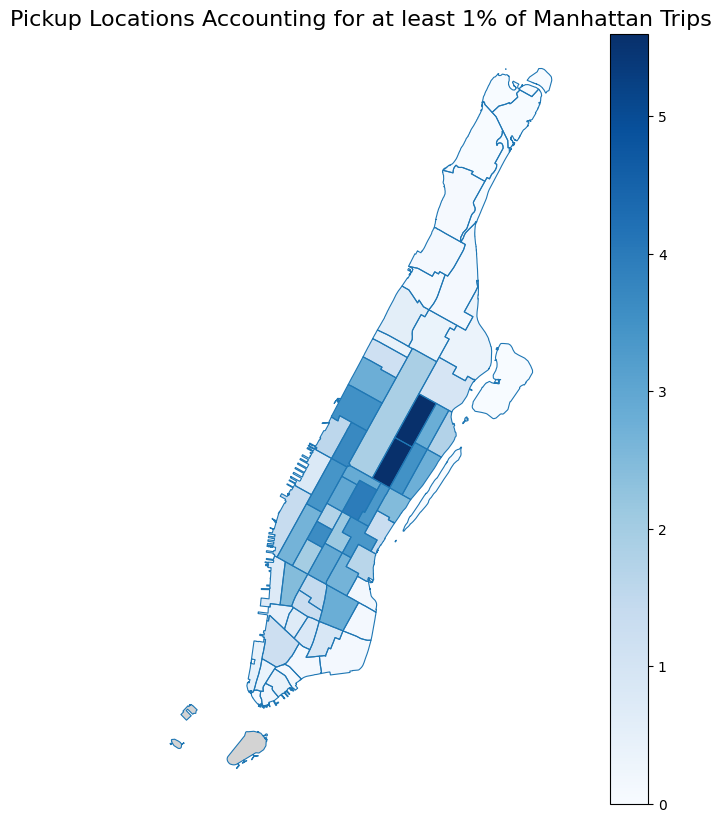

In [48]:
#Mapping the most common Manhattan `PULocationID`s. Threshold is those accounting for at least 1% of rides.

plot_geo_borough(
    geo_taxi_zones,
    manhattan_pulocationsid,
    borough='Manhattan',
    column_to_fill='Ride_Percent',
    min_percent=1,
    fill_color='Blues',
    title='Pickup Locations Accounting for at least 1% of Manhattan Trips',
)

In [49]:
#Creating filtered Panda Series for `DOLocationID`s in Manhattan to identify which borough is accounting for trips

manhattan_dolocationsid = percentage_of_location(manhattan_trips, 'DOLocationID')
manhattan_dolocationsid.head()

,LocationID,Ride_Percent
0,236,5.73
1,237,4.95
2,141,3.58
3,239,3.44
4,161,3.42


In [50]:
#Getting high traffic zones based on PULocationIDs for easy searching Google Maps

manhattan_traffic_do = get_high_traffic_zones(
    manhattan_dolocationsid, NYC_Taxi_Zones, location_type='DOLocationID', threshold=1
)
manhattan_traffic_do.head()

,DOLocationID,Percentage,borough,zone
0,236,5.73,Manhattan,Upper East Side North
1,237,4.95,Manhattan,Upper East Side South
2,141,3.58,Manhattan,Lenox Hill West
3,239,3.44,Manhattan,Upper West Side South
4,161,3.42,Manhattan,Midtown Center


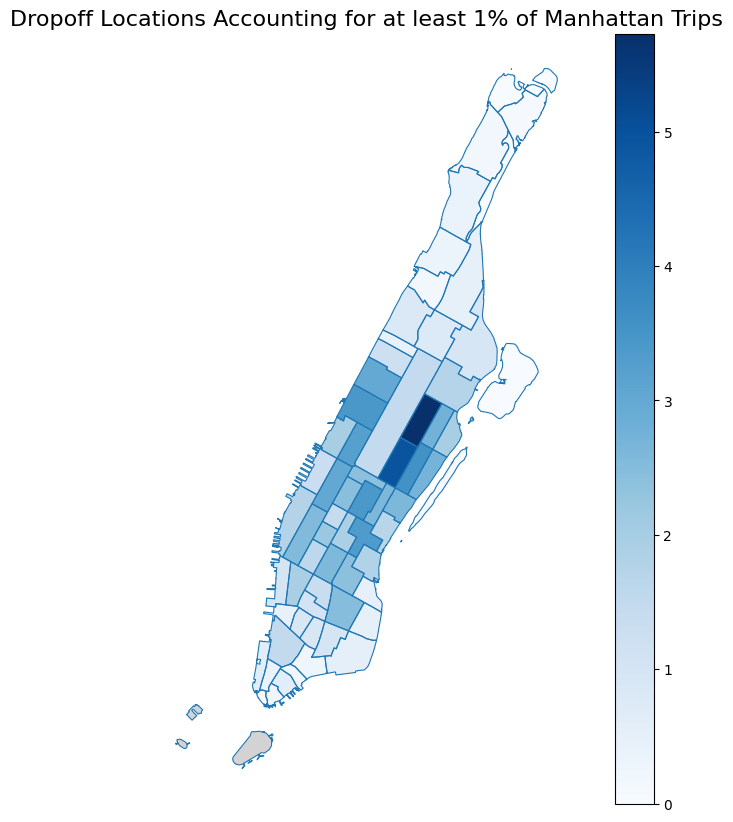

In [51]:
#Mapping the most common Manhattan `DOLocationID`s. Threshold is those accounting for at least 1% of rides.

plot_geo_borough(
    geo_taxi_zones,
    manhattan_dolocationsid,
    borough='Manhattan',
    column_to_fill='Ride_Percent',
    min_percent=1,
    fill_color='Blues',
    title='Dropoff Locations Accounting for at least 1% of Manhattan Trips'
)

For both pickup and dropoff locations, ID 236 and 237 stand out as accounting for a majority of trips. Next steps will include attempting to identify what might be attracting riders to these locations.

###Most common pickup and dropoff locations for longer (5-10 miles & 10+ miles) trips

This question will be answered with a very similar process as the previous one, just adding another condition for trip mileage greater than 5 miles.

In [52]:
NYC_Taxi.head()

,VendorID,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,RatecodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
0,1,2022-01-01 00:35:40,Saturday,12:35 AM,2022-01-01 00:53:29,Saturday,12:53 AM,2,3.80,1,...,1,14.5,3.0,0.5,3.65,0.0,0.3,2.5,0.0,21.95
1,1,2022-01-01 00:33:43,Saturday,12:33 AM,2022-01-01 00:42:07,Saturday,12:42 AM,1,2.10,1,...,1,8.0,0.5,0.5,4.00,0.0,0.3,0.0,0.0,13.30
2,2,2022-01-01 00:53:21,Saturday,12:53 AM,2022-01-01 01:02:19,Saturday,01:02 AM,1,0.97,1,...,1,7.5,0.5,0.5,1.76,0.0,0.3,0.0,0.0,10.56
3,2,2022-01-01 00:25:21,Saturday,12:25 AM,2022-01-01 00:35:23,Saturday,12:35 AM,1,1.09,1,...,2,8.0,0.5,0.5,0.00,0.0,0.3,2.5,0.0,11.80
4,2,2022-01-01 00:36:48,Saturday,12:36 AM,2022-01-01 01:14:20,Saturday,01:14 AM,1,4.30,1,...,1,23.5,0.5,0.5,3.00,0.0,0.3,2.5,0.0,30.30


####5-10 miles trips

In [53]:
#Long trips are those between 5 and 10 miles.
long_trips = NYC_Taxi[(NYC_Taxi['trip_distance']  >=5) & (NYC_Taxi['trip_distance'] <= 10)]
long_trips.head()

,VendorID,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,RatecodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
6,2,2022-01-01 00:20:50,Saturday,12:20 AM,2022-01-01 00:34:58,Saturday,12:34 AM,1,5.07,1,...,1,17.0,0.5,0.5,5.20,0.00,0.3,2.5,0.00,26.00
26,2,2022-01-01 00:46:09,Saturday,12:46 AM,2022-01-01 01:08:06,Saturday,01:08 AM,6,5.95,1,...,1,20.0,0.5,0.5,4.76,0.00,0.3,2.5,0.00,28.56
28,2,2022-01-01 18:04:06,Saturday,06:04 PM,2022-01-01 18:40:52,Saturday,06:40 PM,1,9.70,1,...,1,34.5,0.5,0.5,9.22,6.55,0.3,2.5,1.25,55.32
34,2,2022-01-01 00:55:48,Saturday,12:55 AM,2022-01-01 01:14:24,Saturday,01:14 AM,1,6.67,1,...,1,21.0,0.5,0.5,15.00,0.00,0.3,2.5,1.25,41.05
35,2,2022-01-01 00:12:00,Saturday,12:12 AM,2022-01-01 00:22:47,Saturday,12:22 AM,1,5.18,1,...,1,16.0,0.5,0.5,0.00,0.00,0.3,2.5,0.00,19.80


In [54]:
#Getting an idea how much these rides contribute to the overall size of the dataframe (7.9%)
long_trips.shape

(194832, 25)

In [55]:
#Creating filtered Panda Series for `PULocationID`s in Manhattan to identify which borough is accounting for 5-10 mile trips

long_trips_puborough = percentage_of_location(long_trips, 'Pickup_Borough')
long_trips_puborough

,LocationID,Ride_Percent
0,Manhattan,69.35
1,Queens,25.69
2,Unknown,2.94
3,Brooklyn,1.65
4,Bronx,0.36
5,Staten Island,0.00
6,EWR,0.00


In [56]:
#Repeating for dropoff borough

long_trips_doborough = percentage_of_location(long_trips, 'Dropoff_Borough')
long_trips_doborough

,LocationID,Ride_Percent
0,Manhattan,61.36
1,Queens,17.88
2,Brooklyn,16.70
3,Bronx,2.73
4,Unknown,1.32
5,Staten Island,0.00
6,EWR,0.00


Manhattan continues to be a hotspot for taxi rides, both for origins and for destinations. For pickup boroughs, Queens also fulls ahead as significant. For dropoff borough however, Queens and Brooklyn are pretty even.

Also of note is the difference between pickup and dropoff borough in long trips. This suggests that trips between 5-10 miles might be more varied in their routes than when we looked at all trips together.

The next pieces of analysis will once again attempt to identify the location IDs that are most common for boroughs experiencing the most traffic

#####Long Manhattan Trips

The following process is the same as performed above for most common Manhattan `PULocationID`s and `DOLocationID`s.

In [57]:
#Creating a DataFrame that includes rides between 5-10 miles (long_trips) that began and ended in Manhattan

long_manhattan_trips = long_trips[
    (NYC_Taxi['Pickup_Borough'] == 'Manhattan') &
     (NYC_Taxi['Dropoff_Borough'] == 'Manhattan')]

long_manhattan_trips.head()

<ipython-input-57-a64d258661b1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  long_manhattan_trips = long_trips[


,VendorID,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,RatecodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
6,2,2022-01-01 00:20:50,Saturday,12:20 AM,2022-01-01 00:34:58,Saturday,12:34 AM,1,5.07,1,...,1,17.0,0.5,0.5,5.20,0.0,0.3,2.5,0.0,26.00
26,2,2022-01-01 00:46:09,Saturday,12:46 AM,2022-01-01 01:08:06,Saturday,01:08 AM,6,5.95,1,...,1,20.0,0.5,0.5,4.76,0.0,0.3,2.5,0.0,28.56
35,2,2022-01-01 00:12:00,Saturday,12:12 AM,2022-01-01 00:22:47,Saturday,12:22 AM,1,5.18,1,...,1,16.0,0.5,0.5,0.00,0.0,0.3,2.5,0.0,19.80
36,2,2022-01-01 00:26:04,Saturday,12:26 AM,2022-01-01 00:44:54,Saturday,12:44 AM,1,5.03,1,...,1,18.5,0.5,0.5,6.69,0.0,0.3,2.5,0.0,28.99
72,2,2022-01-01 00:57:37,Saturday,12:57 AM,2022-01-01 01:29:35,Saturday,01:29 AM,1,6.29,1,...,1,24.5,0.5,0.5,1.70,0.0,0.3,2.5,0.0,30.00


In [58]:
#Creating filtered dataframe for `PULocationID`

long_manhattan_pulocationsid = percentage_of_location(long_manhattan_trips, 'PULocationID')
long_manhattan_pulocationsid

,LocationID,Ride_Percent
0,236,3.93
1,231,3.79
2,48,3.66
3,140,3.38
4,79,3.36
...,...,...
61,194,0.01
62,202,0.01
63,153,0.00
64,120,0.00


In [59]:
#Getting high traffic zones based on PULocationIDs for easy searching Google Maps

long_manhattan_traffic_pu = get_high_traffic_zones(
    long_manhattan_pulocationsid, NYC_Taxi_Zones, location_type='PULocationID', threshold=1
)
long_manhattan_traffic_pu.head()

,PULocationID,Percentage,borough,zone
0,236,3.93,Manhattan,Upper East Side North
1,231,3.79,Manhattan,TriBeCa/Civic Center
2,48,3.66,Manhattan,Clinton East
3,140,3.38,Manhattan,Lenox Hill East
4,79,3.36,Manhattan,East Village


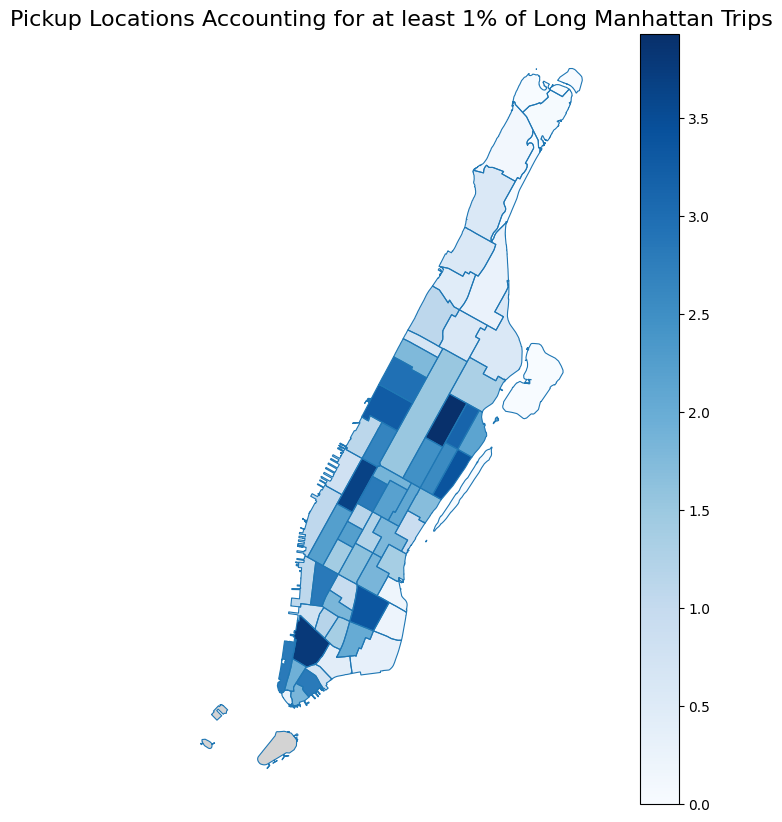

In [60]:
#Mapping the most common Manhattan `PULocationID`s for 5-10 miles trips

plot_geo_borough(
    geo_taxi_zones,
    long_manhattan_pulocationsid,
    borough='Manhattan',
    column_to_fill='Ride_Percent',
    min_percent=1,
    fill_color='Blues',
    title='Pickup Locations Accounting for at least 1% of Long Manhattan Trips'
)

Unlike when this analysis was performed for all trips, no clear PULocation stands out as accounting for more trips. So rather than arbitarily deciding which of the above locations are more important, our team will attempt to find elements in each of these boroughts that may be encouraging taxi rides.

In [61]:
#Repeating this process for `DOLocationID`s

long_manhattan_dolocationsid = percentage_of_location(long_manhattan_trips, 'DOLocationID')
long_manhattan_dolocationsid

,LocationID,Ride_Percent
0,244,5.65
1,231,4.69
2,13,4.50
3,87,4.35
4,42,3.51
...,...,...
61,100,0.32
62,128,0.08
63,120,0.06
64,153,0.06


In [62]:
long_manhattan_traffic_do = get_high_traffic_zones(
    long_manhattan_dolocationsid, NYC_Taxi_Zones, location_type='DOLocationID', threshold=1
)
long_manhattan_traffic_do.head()

,DOLocationID,Percentage,borough,zone
0,244,5.65,Manhattan,Washington Heights South
1,231,4.69,Manhattan,TriBeCa/Civic Center
2,13,4.50,Manhattan,Battery Park City
3,87,4.35,Manhattan,Financial District North
4,42,3.51,Manhattan,Central Harlem North


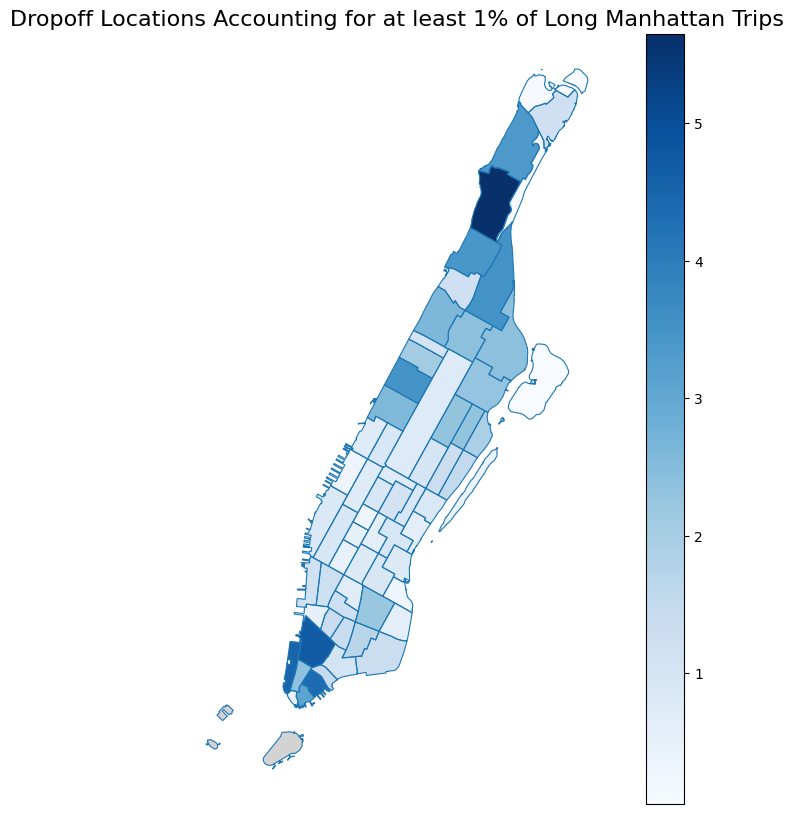

In [63]:
plot_geo_borough(
    geo_taxi_zones,
    long_manhattan_dolocationsid,
    borough='Manhattan',
    column_to_fill='Ride_Percent',
    min_percent=1,
    fill_color='Blues',
    title='Dropoff Locations Accounting for at least 1% of Long Manhattan Trips'
)

For dropoff locations, the ID 244 stands out as accounting for more trips than the other locations and thus may be the one location the team choses to focus on for dropoff location analysis in this section.

#####Long Queens Trips

In [64]:
#creating a DataFrame that includes rides between 5-10 miles that began and ended in Queens

long_queens_trips = long_trips[
    (NYC_Taxi['Pickup_Borough'] == 'Queens') &
     (NYC_Taxi['Dropoff_Borough'] == 'Queens')]

long_queens_trips.head()

<ipython-input-64-967cba1df440>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  long_queens_trips = long_trips[


,VendorID,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,RatecodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
101,2,2022-01-01 00:25:46,Saturday,12:25 AM,2022-01-01 00:40:39,Saturday,12:40 AM,1,6.32,1,...,2,20.0,0.50,0.5,0.00,0.0,0.3,0.0,1.25,22.55
117,1,2022-01-01 00:48:52,Saturday,12:48 AM,2022-01-01 01:01:55,Saturday,01:01 AM,2,5.30,1,...,1,17.0,1.75,0.5,5.85,0.0,0.3,0.0,1.25,25.40
423,2,2022-01-01 00:03:51,Saturday,12:03 AM,2022-01-01 00:15:14,Saturday,12:15 AM,1,5.70,1,...,1,17.5,0.50,0.5,3.76,0.0,0.3,0.0,1.25,23.81
627,1,2022-01-01 00:30:28,Saturday,12:30 AM,2022-01-01 00:52:52,Saturday,12:52 AM,1,8.10,1,...,2,26.0,1.75,0.5,0.00,0.0,0.3,0.0,1.25,28.55
861,2,2022-01-01 00:44:47,Saturday,12:44 AM,2022-01-01 01:01:49,Saturday,01:01 AM,6,9.26,1,...,2,27.0,0.50,0.5,0.00,0.0,0.3,0.0,1.25,29.55


In [65]:
#Selecting just the `PULocationID`s

long_queens_pulocationsid = percentage_of_location(long_queens_trips, 'PULocationID')
long_queens_pulocationsid.head()

,LocationID,Ride_Percent
0,132,61.14
1,138,27.82
2,70,4.51
3,7,0.55
4,226,0.55


In [66]:
#Getting high traffic zones based on PULocationIDs for easy searching Google Maps

long_queens_traffic_pu = get_high_traffic_zones(
    long_queens_pulocationsid, NYC_Taxi_Zones, location_type='PULocationID', threshold=1
)
long_queens_traffic_pu.head()

,PULocationID,Percentage,borough,zone
0,132,61.14,Queens,JFK Airport
1,138,27.82,Queens,LaGuardia Airport
2,70,4.51,Queens,East Elmhurst


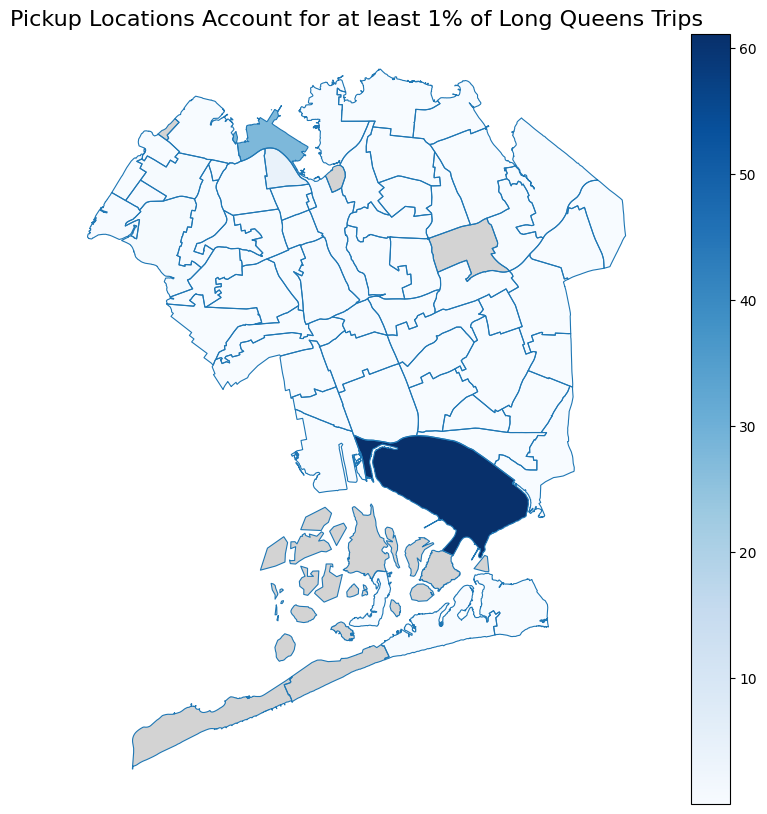

In [67]:
#Mapping those locations that are accounting for at least 1% of trips

plot_geo_borough(
    geo_taxi_zones,
    long_queens_pulocationsid,
    borough='Queens',
    column_to_fill='Ride_Percent',
    min_percent=1,
    fill_color='Blues',
    title='Pickup Locations Account for at least 1% of Long Queens Trips'
)

Immediately, it becomes clear where we should focus our attentions when doing analysis into Queens trips between 5-10 miles that originate in the Queens borough.

In [68]:
#Repeating for `DOLocationID`s

long_queens_dolocationsid = percentage_of_location(long_queens_trips, 'DOLocationID')
long_queens_dolocationsid.head()

,LocationID,Ride_Percent
0,95,10.28
1,130,6.27
2,145,4.74
3,197,4.59
4,28,4.10


In [69]:
long_queens_traffic_do = get_high_traffic_zones(
    long_queens_dolocationsid, NYC_Taxi_Zones, location_type='DOLocationID', threshold=1
)
long_queens_traffic_do.head()

,DOLocationID,Percentage,borough,zone
0,95,10.28,Queens,Forest Hills
1,130,6.27,Queens,Jamaica
2,145,4.74,Queens,Long Island City/Hunters Point
3,197,4.59,Queens,Richmond Hill
4,28,4.10,Queens,Briarwood/Jamaica Hills


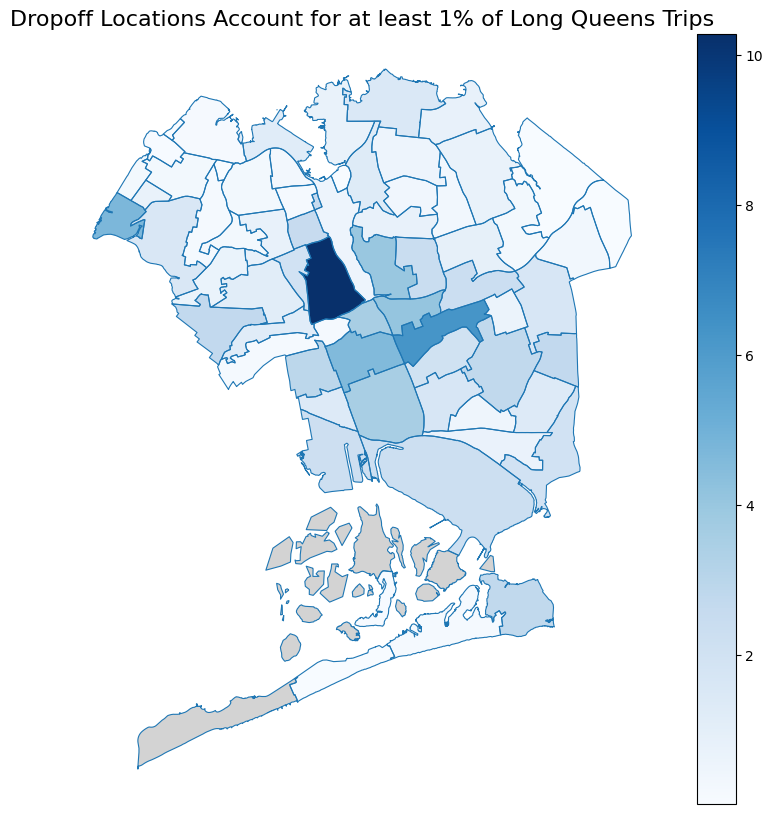

In [70]:
plot_geo_borough(
    geo_taxi_zones,
    long_queens_dolocationsid,
    borough='Queens',
    column_to_fill='Ride_Percent',
    min_percent=1,
    fill_color='Blues',
    title='Dropoff Locations Account for at least 1% of Long Queens Trips'
)

And again, a couple of locations jump out as accounting for more trips, focusing our analysis towards these spots to understand what is driving rides to these destinations.

####10+ mile trips

Hopefully at this point the overall process for completing this part of the analysis is clear. Decided on a condition for the mileage and/or pickup or dropoff location, create a dataframe based on these condition(s), calculate the traffic distribution between boroughs, filter out your `PULocationID`s and `DOLocationID`s for the most popular boroughs, use to `get_high_traffic_zones` function to easily identify the neighborhood or zone, and map (or plot) the locations that are accounting for some part of trips.

In [71]:
#Very long trips are those more than 10 miles
very_long_trips = NYC_Taxi[NYC_Taxi['trip_distance'] > 10]
very_long_trips.head()

,VendorID,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,RatecodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
5,1,2022-01-01 00:40:15,Saturday,12:40 AM,2022-01-01 01:09:48,Saturday,01:09 AM,1,10.30,1,...,1,33.0,3.00,0.5,13.00,6.55,0.3,2.5,0.00,56.35
38,1,2022-01-01 00:10:27,Saturday,12:10 AM,2022-01-01 00:41:59,Saturday,12:41 AM,1,17.10,2,...,1,52.0,3.75,0.5,15.75,6.55,0.3,2.5,1.25,78.85
41,2,2022-01-01 00:31:06,Saturday,12:31 AM,2022-01-01 00:58:26,Saturday,12:58 AM,3,19.14,2,...,1,52.0,0.00,0.5,12.37,6.55,0.3,2.5,1.25,75.47
48,2,2022-01-01 00:56:26,Saturday,12:56 AM,2022-01-01 01:25:09,Saturday,01:25 AM,1,18.81,2,...,1,52.0,0.00,0.5,11.31,0.00,0.3,2.5,1.25,67.86
49,1,2022-01-01 00:33:42,Saturday,12:33 AM,2022-01-01 01:01:49,Saturday,01:01 AM,1,19.50,1,...,1,52.0,1.75,0.5,0.00,6.55,0.3,0.0,1.25,61.10


In [72]:
#Getting an idea how much these rides contribute to the overall size of the dataframe (6.49%)
very_long_trips.shape

(160019, 25)

In [73]:
very_long_trips_puborough = percentage_of_location(very_long_trips, 'Pickup_Borough')
very_long_trips_puborough

,LocationID,Ride_Percent
0,Queens,69.91
1,Manhattan,25.05
2,Unknown,3.66
3,Brooklyn,0.92
4,Bronx,0.40
5,Staten Island,0.05
6,EWR,0.01


In [74]:
very_long_doborough = percentage_of_location(very_long_trips, 'Dropoff_Borough')
very_long_doborough

,LocationID,Ride_Percent
0,Manhattan,44.70
1,Queens,23.77
2,Brooklyn,20.37
3,Bronx,4.99
4,Unknown,3.56
5,EWR,2.30
6,Staten Island,0.30


Interestingly, unlike our previous looks into popular pickup and drop-off boroughs, the list does not resemble each other. This suggests that the trend we saw in long trips continues into very long trips in that these rides are more varied that those traveling less than 10 miles.

This change also forces us to re-think how we decide which boroughs to focus on for further analysis. Previously we picked the top 1-2 boroughts because they were number 1 or 2 for both pickup and dropoff and had percentages that were similar.

For very long trips, we will continue to focus on Manhattan and Queens because they do flip places between pickup and dropoff and have quite different percentages across the two, they still remain the top 2 boroughs for trips.

#####Very Long Queens Trips

In [75]:
vlong_queens_trips = very_long_trips[
    (very_long_trips['Pickup_Borough'] == 'Queens') &
     (very_long_trips['Dropoff_Borough'] == 'Queens')]

vlong_queens_trips.head()

,VendorID,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,RatecodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
118,2,2022-01-01 00:42:02,Saturday,12:42 AM,2022-01-01 01:04:31,Saturday,01:04 AM,1,14.48,1,...,1,40.0,0.50,0.5,8.51,0.0,0.3,0.0,1.25,51.06
251,1,2022-01-01 00:12:37,Saturday,12:12 AM,2022-01-01 00:32:28,Saturday,12:32 AM,4,11.40,1,...,3,32.5,1.75,0.5,0.00,0.0,0.3,0.0,1.25,35.05
296,2,2022-01-01 00:39:37,Saturday,12:39 AM,2022-01-01 01:04:08,Saturday,01:04 AM,1,14.62,1,...,2,41.0,0.50,0.5,0.00,0.0,0.3,0.0,1.25,43.55
634,2,2022-01-01 00:49:23,Saturday,12:49 AM,2022-01-01 01:13:39,Saturday,01:13 AM,3,14.80,1,...,1,41.0,0.50,0.5,4.00,0.0,0.3,0.0,1.25,47.55
768,2,2022-01-01 00:04:14,Saturday,12:04 AM,2022-01-01 00:26:12,Saturday,12:26 AM,1,10.83,1,...,2,31.0,0.50,0.5,0.00,0.0,0.3,0.0,1.25,33.55


In [76]:
vlong_queens_pulocationsid = percentage_of_location(vlong_queens_trips, 'PULocationID')
vlong_queens_pulocationsid.head()

,LocationID,Ride_Percent
0,132,80.30
1,138,13.14
2,70,2.21
3,226,0.79
4,145,0.67


In [77]:
vlong_queens_traffic_pu = get_high_traffic_zones(
    vlong_queens_pulocationsid, NYC_Taxi_Zones, location_type='PULocationID', threshold=1
)
vlong_queens_traffic_pu.head()

,PULocationID,Percentage,borough,zone
0,132,80.30,Queens,JFK Airport
1,138,13.14,Queens,LaGuardia Airport
2,70,2.21,Queens,East Elmhurst


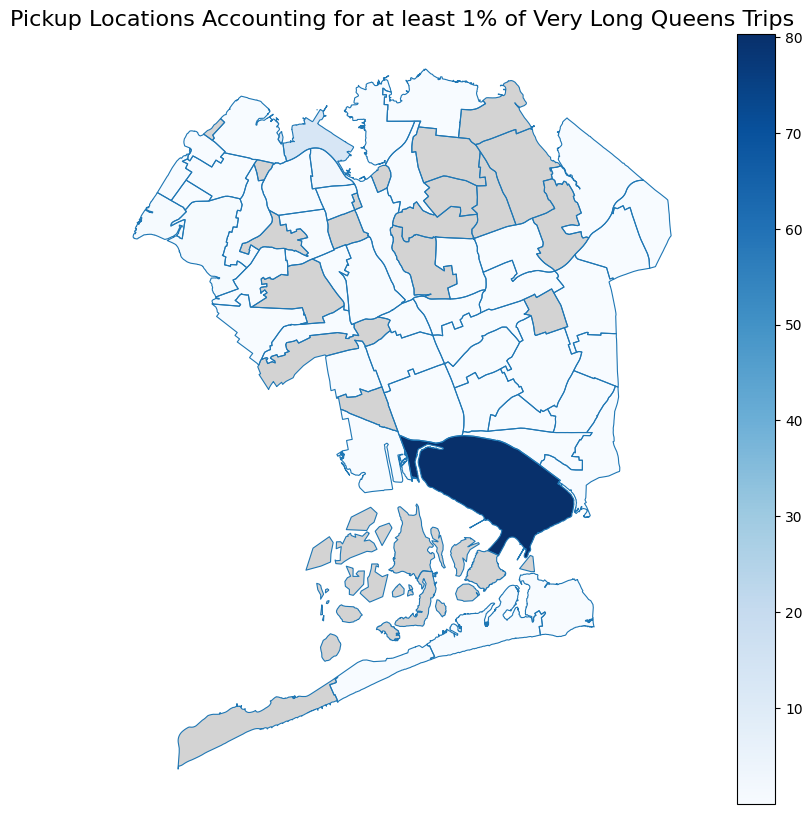

In [78]:
plot_geo_borough(
    geo_taxi_zones,
    vlong_queens_pulocationsid,
    borough='Queens',
    column_to_fill='Ride_Percent',
    min_percent=1,
    fill_color='Blues',
    title='Pickup Locations Accounting for at least 1% of Very Long Queens Trips'
)

In [79]:
vlong_queens_dolocationsid = percentage_of_location(vlong_queens_trips, 'DOLocationID')

In [80]:
vlong_queens_dolocationsid.head()

,LocationID,Ride_Percent
0,138,13.01
1,132,11.26
2,145,6.65
3,7,6.58
4,129,5.66


In [81]:
vlong_queens_traffic_do = get_high_traffic_zones(
    vlong_queens_dolocationsid, NYC_Taxi_Zones, location_type='DOLocationID', threshold=1
)
vlong_queens_traffic_do.head()

,DOLocationID,Percentage,borough,zone
0,138,13.01,Queens,LaGuardia Airport
1,132,11.26,Queens,JFK Airport
2,145,6.65,Queens,Long Island City/Hunters Point
3,7,6.58,Queens,Astoria
4,129,5.66,Queens,Jackson Heights


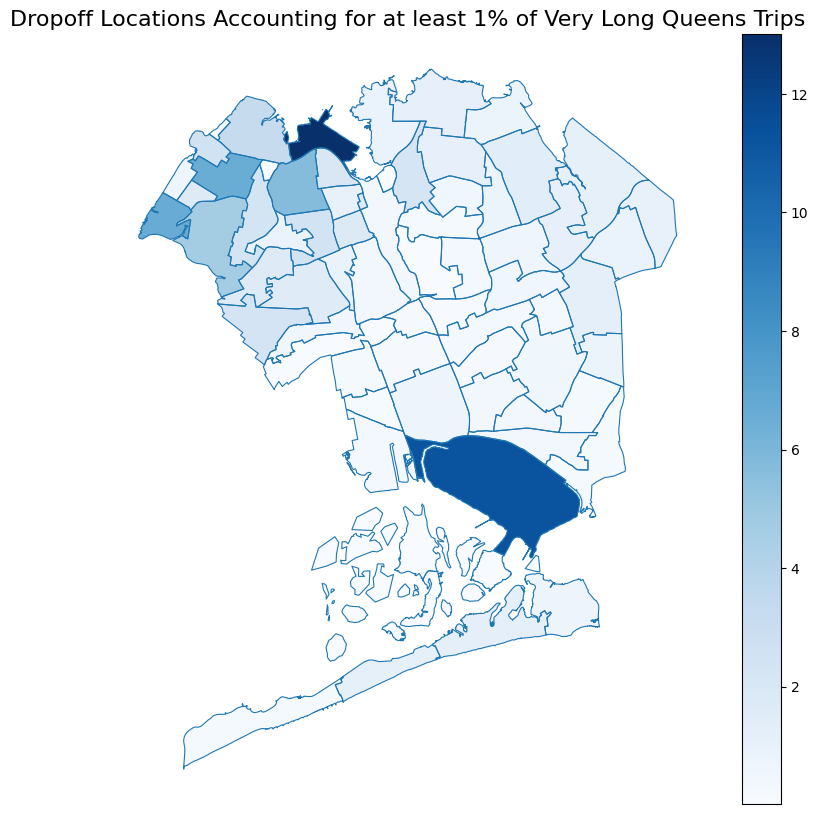

In [82]:
plot_geo_borough(
    geo_taxi_zones,
    vlong_queens_dolocationsid,
    borough='Queens',
    column_to_fill='Ride_Percent',
    min_percent=1,
    fill_color='Blues',
    title='Dropoff Locations Accounting for at least 1% of Very Long Queens Trips'
)

We can clearly see where Queens trips longer than 10 miles are coming and going, clearing up some of the variability that was first evident when just looking at boroughs as a whole.

For pickup IDs, further analysis will focus on 132 and perhaps 132 due to 132 also being the second LocationID being dropped off in Queens.

#####Very Long Manhattan Trips

In [83]:
vlong_manhattan_trips = very_long_trips[
    (very_long_trips['Pickup_Borough'] == 'Manhattan') &
     (very_long_trips['Dropoff_Borough'] == 'Manhattan')]

vlong_manhattan_trips.head()

,VendorID,tpep_pickup_datetime,tpep_pickup_day,tpep_pickup_time,tpep_dropoff_datetime,tpep_dropoff_day,tpep_dropoff_time,passenger_count,trip_distance,RatecodeID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
1031,2,2022-01-01 00:05:13,Saturday,12:05 AM,2022-01-01 00:22:26,Saturday,12:22 AM,2,10.41,1,...,1,29.5,0.5,0.5,6.66,0.0,0.3,2.5,0.0,39.96
1496,1,2022-01-01 00:38:32,Saturday,12:38 AM,2022-01-01 01:07:32,Saturday,01:07 AM,1,10.80,1,...,1,33.0,3.0,0.5,7.00,0.0,0.3,2.5,0.0,43.80
1768,2,2022-01-01 00:52:03,Saturday,12:52 AM,2022-01-01 01:25:20,Saturday,01:25 AM,2,10.20,1,...,1,33.5,0.5,0.5,2.00,0.0,0.3,2.5,0.0,39.30
2236,2,2022-01-01 00:52:11,Saturday,12:52 AM,2022-01-01 01:20:35,Saturday,01:20 AM,1,10.99,1,...,1,34.0,0.5,0.5,7.56,0.0,0.3,2.5,0.0,45.36
3453,2,2022-01-01 00:03:51,Saturday,12:03 AM,2022-01-01 00:34:18,Saturday,12:34 AM,2,10.40,1,...,1,34.0,0.5,0.5,7.56,0.0,0.3,2.5,0.0,45.36


In [84]:
vlong_manhattan_pulocationsid = percentage_of_location(vlong_manhattan_trips, 'PULocationID')
vlong_manhattan_pulocationsid.head()

,LocationID,Ride_Percent
0,79,6.06
1,249,4.83
2,231,4.39
3,107,3.87
4,186,3.49


In [85]:
vlong_manhattan_traffic_pu = get_high_traffic_zones(
    vlong_manhattan_pulocationsid, NYC_Taxi_Zones, location_type='PULocationID', threshold=1
)
vlong_manhattan_traffic_pu.head()

,PULocationID,Percentage,borough,zone
0,79,6.06,Manhattan,East Village
1,249,4.83,Manhattan,West Village
2,231,4.39,Manhattan,TriBeCa/Civic Center
3,107,3.87,Manhattan,Gramercy
4,186,3.49,Manhattan,Penn Station/Madison Sq West


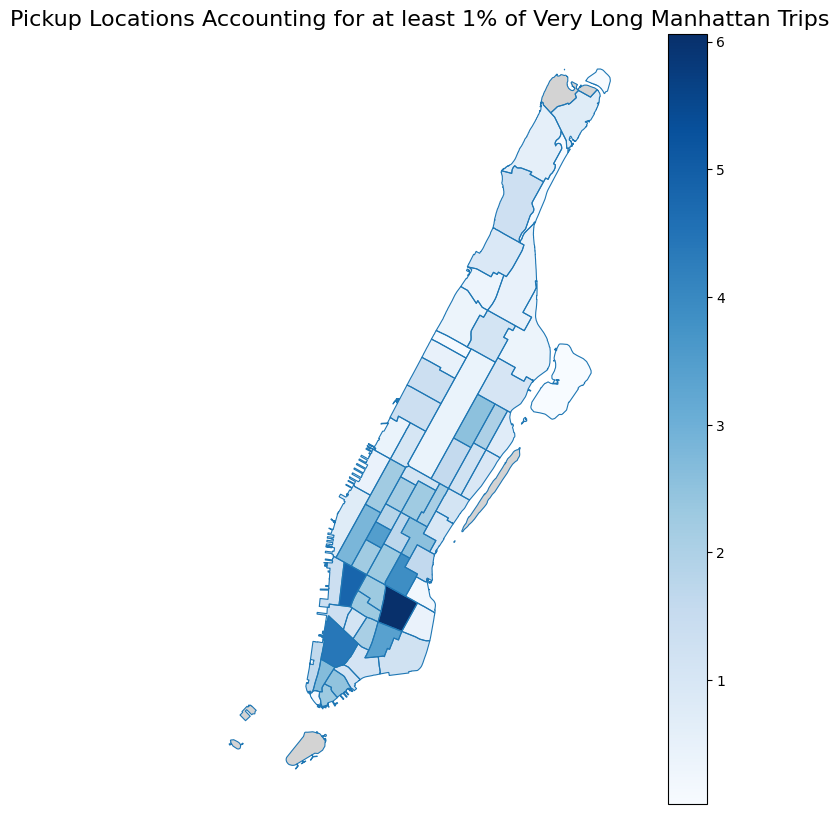

In [90]:
plot_geo_borough(
    geo_taxi_zones,
    vlong_manhattan_pulocationsid,
    borough='Manhattan',
    column_to_fill='Ride_Percent',
    min_percent=1,
    fill_color='Blues',
    title='Pickup Locations Accounting for at least 1% of Very Long Manhattan Trips'
)

In [87]:
vlong_manhattan_dolocationsid = percentage_of_location(vlong_manhattan_trips, 'DOLocationID')
vlong_manhattan_dolocationsid.head()

,LocationID,Ride_Percent
0,243,16.75
1,127,11.78
2,244,11.41
3,116,4.97
4,42,3.70


In [88]:
vlong_manhattan_traffic_do = get_high_traffic_zones(
    vlong_manhattan_dolocationsid, NYC_Taxi_Zones, location_type='DOLocationID', threshold=1
)
vlong_manhattan_traffic_do.head()

,DOLocationID,Percentage,borough,zone
0,243,16.75,Manhattan,Washington Heights North
1,127,11.78,Manhattan,Inwood
2,244,11.41,Manhattan,Washington Heights South
3,116,4.97,Manhattan,Hamilton Heights
4,42,3.70,Manhattan,Central Harlem North


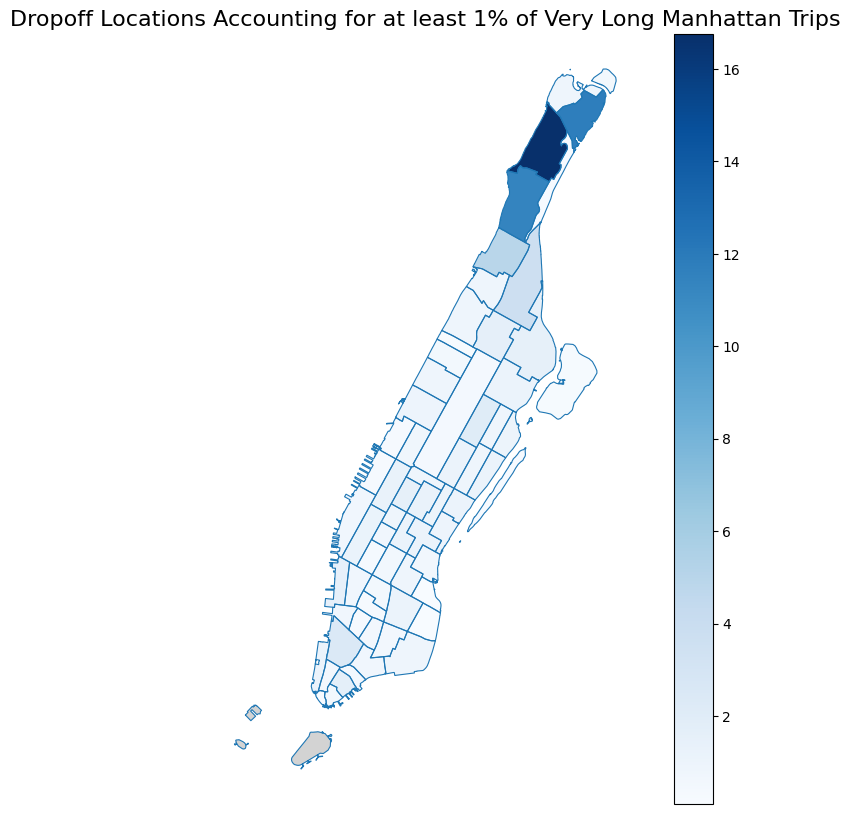

In [89]:
plot_geo_borough(
    geo_taxi_zones,
    vlong_manhattan_dolocationsid,
    borough='Manhattan',
    column_to_fill='Ride_Percent',
    min_percent=1,
    fill_color='Blues',
    title='Dropoff Locations Accounting for at least 1% of Very Long Manhattan Trips'
)

Unlike for Queens, the most common Manhattan destinations do not remain consistent from pickup and dropoff. For PULocationIDs, further analysis will primarily be concerned with 79 as the next most popular ID still only accounts for ~4% whereas 79 accounts for ~6%.

For DOLocationIDs, our main focus will be on 243 with a lead of 16.75% (the next most popular DOLocationIDs only come in at barely reaching 12%)